In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from jupyterthemes import jtplot
# jtplot.style()
!jupyter nbextension enable --py widgetsnbextension
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
# from sklearn.feature_selection import SequentialFeatureSelector
#!jt -r

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


# Importing dataset and EDA

In [2]:
data = pd.read_excel('mysocial-chap08.xlsx')
data = data.rename(columns=lambda x: x.strip())
data

,Age,Educational level,MaxTemp,Weight,Height,Arabic,Indian,Mediterranean,Oriental,FastFood
0,55,1.0,25,77,175,0,1,1,0,0
1,43,2.0,31,110,195,0,1,0,1,1
2,37,5.0,15,70,172,0,1,1,1,0
3,82,3.0,20,85,180,1,0,1,0,0
4,23,3.2,10,65,168,0,0,0,1,0
5,46,5.0,12,75,173,0,1,1,1,0
6,38,4.2,16,75,180,1,0,1,0,0
7,50,4.0,26,63,165,0,1,0,1,1
8,29,4.5,15,55,158,0,1,1,1,0
9,42,4.1,21,66,163,1,0,1,0,0


In [3]:
# profile = ProfileReport(data, title="EDA Report")
# profile

From plotting interactions, only Height and Weight seem to have an approximately linear relationship.
Looking at the correlation table we can also see both are positively correlated.

# Multivariate Linear Regression using forward selection

Forward selection is kind of stepwise regression 
Ther are three types of stewise regression methods, these are:

         1. Forward selection
         2. Backward Elimination
         3. Bidirectional Elimination


    Here I'm going to introduce the Forward selection methods, 

    Forward selection, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.

    `source: https://en.wikipedia.org/wiki/Stepwise_regression´

## With Normalized values

In [4]:
data_n = preprocessing.normalize(data, axis=0)
normalized_data = pd.DataFrame(data_n, columns=data.columns)
normalized_data

,Age,Educational level,MaxTemp,Weight,Height,Arabic,Indian,Mediterranean,Oriental,FastFood
0,0.313229,0.070751,0.342434,0.254830,0.264812,0.00000,0.353553,0.333333,0.000000,0.00000
1,0.244888,0.141503,0.424618,0.364043,0.295076,0.00000,0.353553,0.000000,0.353553,0.57735
2,0.210718,0.353757,0.205460,0.231664,0.260272,0.00000,0.353553,0.333333,0.353553,0.00000
3,0.466996,0.212254,0.273947,0.281306,0.272378,0.57735,0.000000,0.333333,0.000000,0.00000
4,0.130987,0.226404,0.136973,0.215116,0.254219,0.00000,0.000000,0.000000,0.353553,0.00000
5,0.261973,0.353757,0.164368,0.248211,0.261785,0.00000,0.353553,0.333333,0.353553,0.00000
6,0.216413,0.297156,0.219158,0.248211,0.272378,0.57735,0.000000,0.333333,0.000000,0.00000
7,0.284754,0.283005,0.356131,0.208497,0.249680,0.00000,0.353553,0.000000,0.353553,0.57735
8,0.165157,0.318381,0.205460,0.182021,0.239087,0.00000,0.353553,0.333333,0.353553,0.00000
9,0.239193,0.290081,0.287644,0.218426,0.246653,0.57735,0.000000,0.333333,0.000000,0.00000


Fetching independant variables and dependent variables

In [5]:
# profile_2 = ProfileReport(normalized_data, title="EDA Report_normalized")
# profile_2

We see the same behavior as before normalization.

In [6]:
Xn = normalized_data.loc[:, data.columns != 'Height'].values
yn = normalized_data.iloc[:,4].values

In [7]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=11)

### SFS uses k-folds cross validation for forward attibute selection. 

To see the results without the k-folds, cv will be set to 0 in this try.

In [8]:
sfs_forward_ncv0 = SFS(estimator=linear_model.LinearRegression(),
                 k_features = (1,9),
                  forward = True,
                  verbose = 2,
                       cv=0,
                  scoring = "neg_root_mean_squared_error")

In [9]:
sfs_forward_ncv0.fit(Xn_train, yn_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 1/9 -- score: -0.005117300106146857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 2/9 -- score: -0.003631534150334793[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 3/9 -- score: -0.002855343003670931[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=(1, 9),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [10]:
sfs_forward_ncv0.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8)

All columns were selected using future selection.

### Let's try future selection combined with k-fold

using k=5:

In [11]:
sfs_forward_n = SFS(estimator=linear_model.LinearRegression(),
                 k_features = (1,9),
                  forward = True,
                  verbose = 2,
                  scoring = "neg_root_mean_squared_error")


In [12]:
sfs_forward_n.fit(Xn_train, yn_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 1/9 -- score: -0.006183446183714672[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 2/9 -- score: -0.004418053639456599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-11-24 15:30:46] Features: 3/9 -- score: -0.004193229036766036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [13]:
sfs_forward_n.k_feature_idx_

(0, 3, 5)

Column 'Age', 'Height' and 'Indian' were selected.

### Obtain MLR model with selected features

In [14]:
Xn_train_selected = Xn_train[:, sfs_forward_n.k_feature_idx_]
Xn_train_selected

array([[0.26197327, 0.24821105, 0.35355339],
       [0.13098664, 0.21511625, 0.        ],
       [0.1765472 , 0.2746869 , 0.        ],
       [0.21071763, 0.23166365, 0.35355339],
       [0.40435005, 0.38059028, 0.35355339],
       [0.19932749, 0.31440067, 0.35355339],
       [0.28475356, 0.20849728, 0.35355339],
       [0.24488806, 0.36404288, 0.35355339],
       [0.2164127 , 0.23828261, 0.        ],
       [0.31322891, 0.25483001, 0.35355339],
       [0.23919299, 0.21842573, 0.        ]])

In [15]:
Xn_test_selected = Xn_test[:, sfs_forward_n.k_feature_idx_]
Xn_test_selected

array([[0.2164127 , 0.24821105, 0.        ],
       [0.46699583, 0.28130586, 0.        ],
       [0.16515706, 0.18202144, 0.35355339]])

In [16]:
mod_n = linear_model.LinearRegression()
mlr_model_n = mod_n.fit(Xn_train_selected, yn_train)


In [17]:
yn_predicted = mlr_model_n.predict(Xn_test_selected)
yn_predicted 

array([0.26192096, 0.2541404 , 0.24947644])

In [18]:
yn_test

array([0.27237796, 0.27237796, 0.23908732])

### Model Coefficients

In [19]:
print("Coefficients: \n", mlr_model_n.coef_)

Coefficients: 
 [-0.07042764  0.29815608  0.01041002]


### Model intercep

In [20]:
print("Intercept value: \n", mlr_model_n.intercept_)

Intercept value: 
 0.20315676226187115


### Predictive performance measures

In [21]:
mlr_model_n.score(Xn_test_selected, yn_test)

0.25574167276611237

In [22]:
r2_score(yn_test, yn_predicted)

0.25574167276611237

The low accuracy score of our model suggests that our regressive model has not fit very well with the existing data. This suggests that our data is not suitable for linear regression.

In [23]:
mae = mean_absolute_error(yn_test, yn_predicted) 
mse = mean_squared_error(yn_test, yn_predicted)
rmse = mean_squared_error(yn_test,yn_predicted,squared=False)
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:",rmse)


MAE: 0.013027891443514203
MSE: 0.00018329704262817
RMSE: 0.013538723818298754


using k=11: 

In [24]:
sfs_forward_ncv10 = SFS(estimator=linear_model.LinearRegression(),
                 k_features = (1,9),
                  forward = True,
                  verbose = 2,
                        cv=11,
                  scoring = "neg_root_mean_squared_error")


In [25]:
sfs_forward_ncv10.fit(Xn_train, yn_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-24 15:30:49] Features: 1/9 -- score: -0.004689516106096586[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-24 15:30:49] Features: 2/9 -- score: -0.004462445167502085[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-11-24 15:30:49] Features: 3/9 -- score: -0.004087074220923826[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

SequentialFeatureSelector(cv=11, estimator=LinearRegression(),
                          k_features=(1, 9),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [26]:
sfs_forward_ncv10.k_feature_idx_

(0, 3, 4)

## With standardized values

In [27]:
scaler = preprocessing.StandardScaler()
model = scaler.fit(data)
scaled_data_n = model.transform(data)
scaled_data = pd.DataFrame(scaled_data_n, columns=data.columns)
scaled_data

,Age,Educational level,MaxTemp,Weight,Height,Arabic,Indian,Mediterranean,Oriental,FastFood
0,0.690080,-2.131770,0.955047,-0.119401,-0.118616,-0.522233,0.866025,0.745356,-1.154701,-0.522233
1,-0.082810,-1.305045,1.790712,1.850717,1.726526,-0.522233,0.866025,-1.341641,0.866025,1.914854
2,-0.469255,1.175131,-0.437730,-0.537305,-0.395388,-0.522233,0.866025,0.745356,0.866025,-0.522233
3,2.429082,-0.478320,0.258658,0.358203,0.342669,1.914854,-1.154701,0.745356,-1.154701,-0.522233
4,-1.370959,-0.312975,-1.134118,-0.835808,-0.764416,-0.522233,-1.154701,-1.341641,0.866025,-0.522233
5,0.110413,1.175131,-0.855563,-0.238802,-0.303131,-0.522233,0.866025,0.745356,0.866025,-0.522233
6,-0.404847,0.513751,-0.298452,-0.238802,0.342669,1.914854,-1.154701,0.745356,-1.154701,-0.522233
7,0.368043,0.348406,1.094324,-0.955209,-1.041188,-0.522233,0.866025,-1.341641,0.866025,1.914854
8,-0.984514,0.761768,-0.437730,-1.432813,-1.686987,-0.522233,0.866025,0.745356,0.866025,-0.522233
9,-0.147217,0.431078,0.397936,-0.776107,-1.225702,1.914854,-1.154701,0.745356,-1.154701,-0.522233


In [28]:
# profile_3 = ProfileReport(normalized_data, title="EDA Report_standardized")
# profile_3

Same behavior as not scaled data

In [29]:
Xs = scaled_data.loc[:, data.columns != 'Height'].values
ys = scaled_data.iloc[:,4].values

In [30]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=11)

In [31]:
sfs_forward_s = SFS(estimator=linear_model.LinearRegression(),
                 k_features = (1,9),
                  forward = True,
                  verbose = 2,
                  scoring = "neg_root_mean_squared_error")

In [32]:
sfs_forward_s.fit(Xs_train, ys_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-24 15:30:54] Features: 1/9 -- score: -0.37699106469679833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-24 15:30:54] Features: 2/9 -- score: -0.2693589781395539[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-11-24 15:30:54] Features: 3/9 -- score: -0.25565191838353174[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 9),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [33]:
sfs_forward_s.k_feature_idx_

(0, 3, 5)

In [34]:
Xs_train_selected = Xs_train[:, sfs_forward_s.k_feature_idx_]
Xs_train_selected

array([[ 0.11041283, -0.23880217,  0.8660254 ],
       [-1.37095926, -0.8358076 , -1.15470054],
       [-0.8556994 ,  0.23880217, -1.15470054],
       [-0.46925451, -0.53730488,  0.8660254 ],
       [ 1.72059988,  2.14921953,  0.8660254 ],
       [-0.59806948,  0.95520868,  0.8660254 ],
       [ 0.36804275, -0.95520868,  0.8660254 ],
       [-0.08280962,  1.85071682,  0.8660254 ],
       [-0.40484703, -0.4179038 , -1.15470054],
       [ 0.69008016, -0.11940109,  0.8660254 ],
       [-0.1472171 , -0.77610705, -1.15470054]])

In [35]:
Xs_test_selected = Xs_test[:, sfs_forward_s.k_feature_idx_]
Xs_test_selected

array([[-0.40484703, -0.23880217, -1.15470054],
       [ 2.42908218,  0.35820326, -1.15470054],
       [-0.98451437, -1.43281302,  0.8660254 ]])

In [36]:
mod_s = linear_model.LinearRegression()
mlr_model_s = mod_n.fit(Xs_train_selected, ys_train)

In [37]:
ys_predicted = mlr_model_s.predict(Xs_test_selected)
ys_predicted 

array([-0.29487074, -0.7692344 , -1.05358591])

In [38]:
print("Coefficients: \n", mlr_model_s.coef_)

Coefficients: 
 [-0.37967016  1.00768714  0.11104515]


Our model gave bigger coefficient to the 'Weight' attribute.

In [39]:
print("Intercept value: \n", mlr_model_s.intercept_)

Intercept value: 
 -0.07971730309032263


In [40]:
mlr_model_s.score(Xs_test_selected, ys_test)

0.25574167276611715

In [41]:
r2_score(ys_test, ys_predicted)

0.25574167276611715

In [42]:
mae = mean_absolute_error(yn_test, yn_predicted) 
mse = mean_squared_error(yn_test, yn_predicted)
rmse = mean_squared_error(yn_test,yn_predicted,squared=False)
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:",rmse)

MAE: 0.013027891443514203
MSE: 0.00018329704262817
RMSE: 0.013538723818298754


Our results are exactly the same withh either normalized (l2) or standardized data (z-score)

# k-fold cross validation

Will try to use k-fold alone (without future selection), with 10 folds. <br>
For the purpose of experimentation, the original dataset will be used (without normalization or standardization)

LinearRegression after k-fold and OLS are used for model prediction.

In [43]:
kf = KFold(n_splits=10, shuffle=True,random_state=11)

In [44]:
Xk = data.loc[:, data.columns != 'Height'].values
yk = data.iloc[:,4].values

kf.get_n_splits(Xk)

10

In [45]:
print(kf)

KFold(n_splits=10, random_state=11, shuffle=True)


In [46]:
score_list = [] # to store R squared
rmse_list = [] # to store root mean square
mse_list =[] # to store mean square error
mae_list = [] # to store mean absolute error
mlr_model = linear_model.LinearRegression()
for train_index, test_index in kf.split(Xk):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xk_train, Xk_test = Xk[train_index], Xk[test_index]
    yk_train, yk_test = yk[train_index], yk[test_index]
    mlr_model.fit(Xk_train, yk_train)
    yk_predict = mlr_model.predict(Xk_test)
    score_list.append(mlr_model.score(Xk_test, yk_test))
    rmse_fold = mean_squared_error(yk_test, yk_predict,squared=False)
    rmse_list.append(rmse_fold)
    mse_fold = mean_squared_error(yk_test, yk_predict)
    mse_list.append(mse_fold)
    mae_fold = mean_absolute_error(yk_test, yk_predict)
    mae_list.append(mae_fold)

TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

In [47]:
p_measures = pd.DataFrame({'R^2': score_list, 'RMSE':rmse_list, 'MSE': mse_list, 'MAE': mae_list})
p_measures

,R^2,RMSE,MSE,MAE
0,0.000000,10.016208,100.324417,8.597212
1,0.613326,4.663735,21.750425,4.564796
2,0.895864,2.742966,7.523862,2.261343
3,-1.782807,16.681747,278.280688,12.323263
4,NaN,3.509996,12.320070,3.509996
5,NaN,30.991470,960.471195,30.991470
6,NaN,18.094416,327.407887,18.094416
7,NaN,3.699350,13.685191,3.699350
8,NaN,9.046063,81.831253,9.046063
9,NaN,10.636148,113.127640,10.636148


### Comparing with OLS lib

In [48]:
lm = smf.ols(formula='Height ~ Age + Q("Educational level") + MaxTemp + Weight + Arabic + Indian + Mediterranean + Oriental + FastFood', data = data).fit()
comparison = pd.DataFrame({"y_test": yk_test, "y_predict": yk_predict})
print("Summary: ", lm.summary())
print("R Squared Mean: ", np.mean(score_list))
print("RMSE mean: ", np.mean(rmse_list))
print("MSE mean: ", np.mean(mse_list))
print("MAE mean: ", np.mean(mae_list))

Summary:                              OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     7.944
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0307
Time:                        15:31:06   Log-Likelihood:                -32.665
No. Observations:                  14   AIC:                             85.33
Df Residuals:                       4   BIC:                             91.72
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
comparison

,y_test,y_predict
0,163,173.636148


## Using normalized data

In [50]:
Xkn = normalized_data.loc[:, data.columns != 'Height'].values
ykn = normalized_data.iloc[:,4].values

In [51]:
score_list_n = [] # to store R squared
rmse_list_n = [] # to store root mean square
mse_list_n =[] # to store mean square error
mae_list_n = [] # to store mean absolute error
mlr_model_n = linear_model.LinearRegression()
for train_index, test_index in kf.split(Xkn):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xkn_train, Xkn_test = Xkn[train_index], Xkn[test_index]
    ykn_train, ykn_test = ykn[train_index], ykn[test_index]
    mlr_model_n.fit(Xkn_train, ykn_train)
    ykn_predict = mlr_model_n.predict(Xkn_test)
    score_list_n.append(mlr_model_n.score(Xkn_test, ykn_test))
    rmse_fold = mean_squared_error(ykn_test, ykn_predict,squared=False)
    rmse_list_n.append(rmse_fold)
    mse_fold = mean_squared_error(ykn_test, ykn_predict)
    mse_list_n.append(mse_fold)
    mae_fold = mean_absolute_error(ykn_test, ykn_predict)
    mae_list_n.append(mae_fold)

TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

In [52]:
p_measures_n = pd.DataFrame({'R^2': score_list_n, 'RMSE':rmse_list_n, 'MSE': mse_list_n, 'MAE': mae_list_n})
p_measures_n

,R^2,RMSE,MSE,MAE
0,0.000000,0.015157,0.000230,0.013009
1,0.613326,0.007057,0.000050,0.006907
2,0.895864,0.004151,0.000017,0.003422
3,-1.782807,0.025243,0.000637,0.018648
4,NaN,0.005311,0.000028,0.005311
5,NaN,0.046897,0.002199,0.046897
6,NaN,0.027381,0.000750,0.027381
7,NaN,0.005598,0.000031,0.005598
8,NaN,0.013689,0.000187,0.013689
9,NaN,0.016095,0.000259,0.016095


### Comparing with OLS  lib

In [53]:
lm_n = smf.ols(formula='Height ~ Age + Q("Educational level") + MaxTemp + Weight + Arabic + Indian + Mediterranean + Oriental + FastFood', data = normalized_data).fit()
comparison_n = pd.DataFrame({"y_test": ykn_test, "y_predict": ykn_predict})
print("Summary: ", lm_n.summary())
print("R Squared Mean: ", np.mean(score_list_n))
print("RMSE mean: ", np.mean(rmse_list_n))
print("MSE mean: ", np.mean(mse_list_n))
print("MAE mean: ", np.mean(mae_list_n))

Summary:                              OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     7.944
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0307
Time:                        15:31:09   Log-Likelihood:                 58.244
No. Observations:                  14   AIC:                            -96.49
Df Residuals:                       4   BIC:                            -90.10
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

C:\Users\Asus\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
comparison_n

,y_test,y_predict
0,0.246653,0.262748


##  Using Ridge Regression

In [55]:
Xknr = normalized_data.loc[:, data.columns != 'Height'].values
yknr = normalized_data.iloc[:,4].values

In [56]:
alpha_list = []
score_list_nr = [] # to store R squared
rmse_list_nr = [] # to store root mean square
mse_list_nr =[] # to store mean square error
mae_list_nr = [] # to store mean absolute error
bx = []

for i in [0.1, 0.5, 1]:
    ridge_model_n = linear_model.Ridge(alpha=i, random_state=11)
    for train_index, test_index in kf.split(Xkn):
        print("TRAIN:", train_index, "TEST:", test_index)
        Xknr_train, Xknr_test = Xknr[train_index], Xknr[test_index]
        yknr_train, yknr_test = yknr[train_index], yknr[test_index]
        ridge_model_n.fit(Xknr_train, yknr_train)
        yknr_predict = ridge_model_n.predict(Xknr_test)
        score_list_nr.append(ridge_model_n.score(Xknr_test, yknr_test))
        rmse_fold = mean_squared_error(yknr_test, yknr_predict,squared=False)
        rmse_list_nr.append(rmse_fold)
        mse_fold = mean_squared_error(yknr_test, yknr_predict)
        mse_list_nr.append(mse_fold)
        mae_fold = mean_absolute_error(yknr_test, yknr_predict)
        mae_list_nr.append(mae_fold)
        alpha_list.append(i)
        bx.append(np.append(ridge_model_n.intercept_, np.array(ridge_model_n.coef_)))

bx = np.array(bx)

TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]
TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

In [57]:
p_measures_nr = pd.DataFrame({
    'Alpha': alpha_list,
    'R^2': score_list_nr,
    'RMSE':rmse_list_nr,
    'MSE': mse_list_nr,
    'MAE': mae_list_nr,
    'B0': bx[:,0],
    'B1': bx[:,1],
    'B2': bx[:,2],
    'B3': bx[:,3],
    'B4': bx[:,4],
    'B5': bx[:,5],
    'B6': bx[:,6],
    'B7': bx[:,7],
    'B8': bx[:,8],
    'B9': bx[:,9],
})
p_measures_nr

,Alpha,R^2,RMSE,MSE,MAE,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,0.1,0.000000,0.018400,0.000339,0.018138,0.250057,0.011484,-0.006924,0.010551,0.064801,-2.075611e-02,-0.003526,-0.017259,-0.001919,0.006204
1,0.1,-1.487263,0.017899,0.000320,0.015473,0.250912,0.010660,-0.004404,0.001944,0.059031,-2.967567e-03,0.007291,-0.007655,0.003159,0.003736
2,0.1,-1.160025,0.018904,0.000357,0.018314,0.259982,0.012408,-0.017261,0.007990,0.054869,2.221698e-03,0.003144,-0.037694,-0.007773,-0.001991
3,0.1,0.219925,0.013365,0.000179,0.009568,0.246291,0.009995,-0.008823,0.023490,0.060835,-1.669025e-03,-0.010753,-0.010290,0.008689,-0.000816
4,0.1,NaN,0.029700,0.000882,0.029700,0.252034,0.016297,-0.017362,-0.010406,0.055861,-2.752065e-03,-0.012728,0.005739,-0.002069,0.023997
5,0.1,NaN,0.035781,0.001280,0.035781,0.249674,0.020337,0.005395,0.019137,0.041123,-3.984824e-03,-0.008220,-0.018795,0.003109,0.025785
6,0.1,NaN,0.026753,0.000716,0.026753,0.253218,0.023385,0.007887,-0.004479,0.055796,-7.051065e-03,-0.003084,-0.020927,-0.014418,-0.006860
7,0.1,NaN,0.006307,0.000040,0.006307,0.252070,0.014306,-0.006843,0.009549,0.067166,-7.861613e-03,-0.009040,-0.015242,-0.006496,0.005709
8,0.1,NaN,0.003987,0.000016,0.003987,0.250392,0.015870,-0.009160,0.010599,0.067323,-5.217415e-03,-0.004084,-0.015773,-0.004682,0.004268
9,0.1,NaN,0.022010,0.000484,0.022010,0.251568,0.007519,-0.001943,0.013810,0.063536,5.760197e-03,-0.006816,-0.015947,-0.007336,0.007093


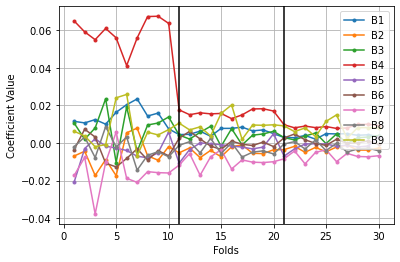

In [58]:
#lines = p_measures_nr.plot.line()
x = [item for item in range(1, 31)]
plt.xlabel("Folds")
plt.ylabel("Coefficient Value")
plt.plot(x, p_measures_nr['B1'], '-', marker=".")
plt.plot(x, p_measures_nr['B2'], '-', marker=".")
plt.plot(x, p_measures_nr['B3'], '-', marker=".")
plt.plot(x, p_measures_nr['B4'], '-', marker=".")
plt.plot(x, p_measures_nr['B5'], '-', marker=".")
plt.plot(x, p_measures_nr['B6'], '-', marker=".")
plt.plot(x, p_measures_nr['B7'], '-', marker=".")
plt.plot(x, p_measures_nr['B8'], '-', marker=".")
plt.plot(x, p_measures_nr['B9'], '-', marker=".")
plt.axvline(x=11, color="black")
plt.axvline(x=21, color="black")
plt.legend(["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9"], loc="upper right")
plt.grid()
plt.show()

#### Final comments about Ridge

For alpha = 0.1, it is seen a bigger weight of B4 (Weight Feature).

## Using Lasso Regression (Non Normalized Data)

In [59]:
Xknl = data.loc[:, data.columns != 'Height'].values
yknl = data.iloc[:,4].values

In [60]:
alpha_list_nl = []
score_list_nl = [] # to store R squared
rmse_list_nl = [] # to store root mean square
mse_list_nl =[] # to store mean square error
mae_list_nl = [] # to store mean absolute error
bx_l = []

for i in [0.1, 0.5, 1]:
    lasso_model_n = linear_model.Lasso(alpha=i, random_state=11)
    for train_index, test_index in kf.split(Xknl):
        print("TRAIN:", train_index, "TEST:", test_index)
        Xknl_train, Xknl_test = Xknl[train_index], Xknl[test_index]
        yknl_train, yknl_test = yknl[train_index], yknl[test_index]
        lasso_model_n.fit(Xknl_train, yknl_train)
        yknl_predict = lasso_model_n.predict(Xknl_test)
        score_list_nl.append(lasso_model_n.score(Xknl_test, yknl_test))
        rmse_fold = mean_squared_error(yknl_test, yknl_predict,squared=False)
        rmse_list_nl.append(rmse_fold)
        mse_fold = mean_squared_error(yknl_test, yknl_predict)
        mse_list_nl.append(mse_fold)
        mae_fold = mean_absolute_error(yknl_test, yknl_predict)
        mae_list_nl.append(mae_fold)
        alpha_list_nl.append(i)
        bx_l.append(np.append(lasso_model_n.intercept_, np.array(lasso_model_n.coef_)))

bx_l = np.array(bx_l)

TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13] TEST: [11]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [0]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13] TEST: [9]
TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13] TEST: [3 6]
TRAIN: [ 0  1  2  3  4  6  7  9 10 11 12 13] TEST: [5 8]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 13] TEST: [ 4 12]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [ 2 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13] TEST: [7]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [1]
TRAIN: [ 0 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

In [61]:
p_measures_nl = pd.DataFrame({
    'Alpha': alpha_list_nl,
    'R^2': score_list_nl,
    'RMSE':rmse_list_nl,
    'MSE': mse_list_nl,
    'MAE': mae_list_nl,
    'B0': bx_l[:,0],
    'B1': bx_l[:,1],
    'B2': bx_l[:,2],
    'B3': bx_l[:,3],
    'B4': bx_l[:,4],
    'B5': bx_l[:,5],
    'B6': bx_l[:,6],
    'B7': bx_l[:,7],
    'B8': bx_l[:,8],
    'B9': bx_l[:,9],
})
p_measures_nl

,Alpha,R^2,RMSE,MSE,MAE,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,0.1,0.000000,8.879933,78.853207,8.784064,121.609359,-0.092580,0.741520,0.178983,0.685003,-6.529692,-2.573370,0.999655,0.127427,-1.588338
1,0.1,0.591538,4.793325,22.975965,4.621488,122.291861,-0.072427,0.471947,0.047462,0.679690,0.000000,-0.406776,2.019414,1.870652,-2.420451
2,0.1,0.755719,4.201110,17.649327,3.336846,122.116001,-0.053863,0.401490,0.166209,0.667562,0.000000,-0.837017,0.000000,0.000000,-2.954050
3,0.1,0.118549,9.388562,88.145105,6.931581,119.063697,-0.042275,0.516582,-0.185873,0.784731,0.000000,-0.000000,-0.000000,-0.824770,-0.000000
4,0.1,NaN,4.074644,16.602721,4.074644,123.120725,-0.065545,0.005935,0.044055,0.680509,-0.000000,-2.807021,2.658567,1.909054,-0.000000
5,0.1,NaN,13.349982,178.222024,13.349982,113.338844,-0.152683,-0.000000,0.001087,0.881626,0.000000,-1.191994,2.375948,0.133627,-8.566984
6,0.1,NaN,5.938311,35.263540,5.938311,116.107834,-0.110187,-0.000000,0.211729,0.757791,-0.000000,-3.384116,3.073915,3.032031,-0.000000
7,0.1,NaN,0.296950,0.088179,0.296950,120.899543,-0.076747,0.447215,0.108357,0.706007,-0.000000,-2.243123,0.954598,1.078223,-2.252594
8,0.1,NaN,8.723221,76.094580,8.723221,114.341986,-0.071088,1.962899,0.079738,0.731623,-0.000000,-4.446710,0.000000,1.295892,-0.000000
9,0.1,NaN,9.857591,97.172098,9.857591,119.761182,-0.091439,1.063432,0.255084,0.685221,0.000000,-4.246148,1.995462,-0.000000,-0.673295


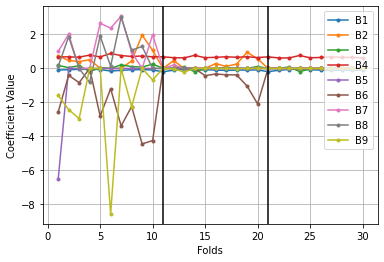

In [62]:
#lines = p_measures_nr.plot.line()
x = [item for item in range(1, 31)]
plt.xlabel("Folds")
plt.ylabel("Coefficient Value")
plt.plot(x, p_measures_nl['B1'], '-', marker=".")
plt.plot(x, p_measures_nl['B2'], '-', marker=".")
plt.plot(x, p_measures_nl['B3'], '-', marker=".")
plt.plot(x, p_measures_nl['B4'], '-', marker=".")
plt.plot(x, p_measures_nl['B5'], '-', marker=".")
plt.plot(x, p_measures_nl['B6'], '-', marker=".")
plt.plot(x, p_measures_nl['B7'], '-', marker=".")
plt.plot(x, p_measures_nl['B8'], '-', marker=".")
plt.plot(x, p_measures_nl['B9'], '-', marker=".")
plt.axvline(x=11, color="black")
plt.axvline(x=21, color="black")
plt.legend(["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B9"], loc="upper right")
plt.grid()
plt.show()

For alpha = 1.0, it is seen a bigger weight of B4 (Weight Feature).

## Lasso without K-Fold

In [63]:
scaler = preprocessing.StandardScaler()
model = scaler.fit(data)
scaled_data_n_all = model.transform(data)
scaled_data_n_all_df = pd.DataFrame(scaled_data_n_all, columns=data.columns)
Xsl = scaled_data_n_all_df.loc[:, scaled_data_n_all_df.columns != 'Height'].values
ysl = scaled_data_n_all_df.iloc[:,4].values
Xsl_train, Xsl_test, ysl_train, ysl_test = train_test_split(Xsl, ysl, test_size=0.2, random_state=11)
Xsl_train, ysl_train

(array([[ 0.11041283,  1.17513082, -0.85556258, -0.23880217, -0.52223297,
          0.8660254 ,  0.74535599,  0.8660254 , -0.52223297],
        [-1.37095926, -0.31297454, -1.13411784, -0.8358076 , -0.52223297,
         -1.15470054, -1.34164079,  0.8660254 , -0.52223297],
        [-0.8556994 ,  1.00978578, -1.4126731 ,  0.23880217, -0.52223297,
         -1.15470054,  0.74535599,  0.8660254 , -0.52223297],
        [-0.46925451,  1.17513082, -0.43772969, -0.53730488, -0.52223297,
          0.8660254 ,  0.74535599,  0.8660254 , -0.52223297],
        [ 1.72059988, -1.05702722, -0.85556258,  2.14921953, -0.52223297,
          0.8660254 , -1.34164079, -1.15470054,  1.91485422],
        [-0.59806948,  0.76176822,  1.65143475,  0.95520868, -0.52223297,
          0.8660254 , -1.34164079,  0.8660254 , -0.52223297],
        [ 0.36804275,  0.34840562,  1.09432423, -0.95520868, -0.52223297,
          0.8660254 , -1.34164079,  0.8660254 ,  1.91485422],
        [-0.08280962, -1.30504478,  1.79071238, 

In [64]:
alpha_list_nls = []
score_list_nls = [] # to store R squared
rmse_list_nls = [] # to store root mean square
mse_list_nls =[] # to store mean square error
mae_list_nls = [] # to store mean absolute error
bx_ls = []

for i in [0.1, 0.5, 1]:
    lasso_model_ns = linear_model.Lasso(alpha=i, random_state=11)
    lasso_model_ns.fit(Xsl_train, ysl_train)
    ynls_predict = lasso_model_ns.predict(Xsl_test)
    score_list_nls.append(lasso_model_ns.score(Xsl_test, ysl_test))
    rmse_fold = mean_squared_error(ysl_test, ynls_predict, squared=False)
    rmse_list_nls.append(rmse_fold)
    mse_fold = mean_squared_error(ysl_test, ynls_predict)
    mse_list_nls.append(mse_fold)
    mae_fold = mean_absolute_error(ysl_test, ynls_predict)
    mae_list_nls.append(mae_fold)
    alpha_list_nls.append(i)
    bx_ls.append(np.append(lasso_model_ns.intercept_, np.array(lasso_model_ns.coef_)))

bx_ls = np.array(bx_ls)

In [65]:
p_measures_nls = pd.DataFrame({
    'Alpha': alpha_list_nls,
    'R^2': score_list_nls,
    'RMSE':rmse_list_nls,
    'MSE': mse_list_nls,
    'MAE': mae_list_nls,
    'B0': bx_ls[:,0],
    'B1': bx_ls[:,1],
    'B2': bx_ls[:,2],
    'B3': bx_ls[:,3],
    'B4': bx_ls[:,4],
    'B5': bx_ls[:,5],
    'B6': bx_ls[:,6],
    'B7': bx_ls[:,7],
    'B8': bx_ls[:,8],
    'B9': bx_ls[:,9],
})
p_measures_nls

,Alpha,R^2,RMSE,MSE,MAE,B0,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,0.1,0.709562,0.515636,0.265880,0.471027,-0.021406,-0.0,0.0,0.0,0.824121,-0.014292,-0.0,0.0,0.074434,-0.0
1,0.5,0.498029,0.677885,0.459528,0.548839,0.038163,0.0,-0.0,0.0,0.443009,-0.000000,0.0,-0.0,0.000000,0.0
2,1.0,-0.197254,1.046910,1.096022,0.760422,0.091059,0.0,-0.0,0.0,0.000000,-0.000000,0.0,-0.0,0.000000,0.0


## Using Cross Validation

In [593]:
scaler = preprocessing.StandardScaler() # MinMaxScaler(), for normalizing
df_cv_scaled = scaler.fit_transform(data)
df_cv_scaled = pd.DataFrame(df_cv_scaled, columns=data.columns)
Xcv = df_cv_scaled.loc[:, df_cv_scaled.columns != 'Height'].values
ycv = df_cv_scaled.iloc[:,4].values

In [594]:
global_scores = np.empty((6, 0))
for regr_n, regr in [
    (0, linear_model.LinearRegression()),
    (1, linear_model.Ridge(alpha=0.5)),
    (2, linear_model.Lasso(alpha=0.5))]:
    for n_splits in range(2, 10):
        for rnd_s in range(30):
            kf_cv = KFold(n_splits=n_splits, shuffle=True, random_state=rnd_s)
            if regr_n != 2:
                sfs = SFS(regr,
                          k_features="parsimonious",
                          forward=True,
                          scoring='neg_root_mean_squared_error',
                          cv=kf_cv)
                Xcv_sel = sfs.fit_transform(Xcv, ycv)
            else:
                Xcv_sel = Xcv

            scores = cross_validate(regr, Xcv_sel, ycv, cv=kf_cv,
                                    scoring=('neg_root_mean_squared_error'),
                                    return_train_score=True)
            global_scores = np.append(global_scores, [
                np.full(scores['test_score'].shape, regr_n).T,
                np.full(scores['test_score'].shape, n_splits).T,
                np.full(scores['test_score'].shape, rnd_s).T,
                scores['test_score'].T,
                scores['train_score'].T,
                np.full(scores['test_score'].shape, Xcv_sel.shape[1]).T,
            ], axis=1)
global_scores.shape

(6, 3960)

In [595]:
gs_df = pd.DataFrame({
    'type': global_scores[0, :],
    'k_folds': global_scores[1, :],
    'random_state' : global_scores[2, :],
    'test_RMSE' : global_scores[3, :],
    'train_RMSE' : global_scores[4, :],
    'feat_count' : global_scores[5, :],
})
gs_df

,type,k_folds,random_state,test_RMSE,train_RMSE,feat_count
0,0.0,2.0,0.0,-0.123230,-0.059205,2.0
1,0.0,2.0,0.0,-0.104126,-0.102036,2.0
2,0.0,2.0,1.0,-0.104608,-0.105039,1.0
3,0.0,2.0,1.0,-0.130630,-0.066932,1.0
4,0.0,2.0,2.0,-0.072478,-0.121705,1.0
...,...,...,...,...,...,...
3955,2.0,9.0,29.0,-0.385418,-0.277786,9.0
3956,2.0,9.0,29.0,-0.532225,-0.268682,9.0
3957,2.0,9.0,29.0,-0.124740,-0.302179,9.0
3958,2.0,9.0,29.0,-0.108108,-0.302636,9.0


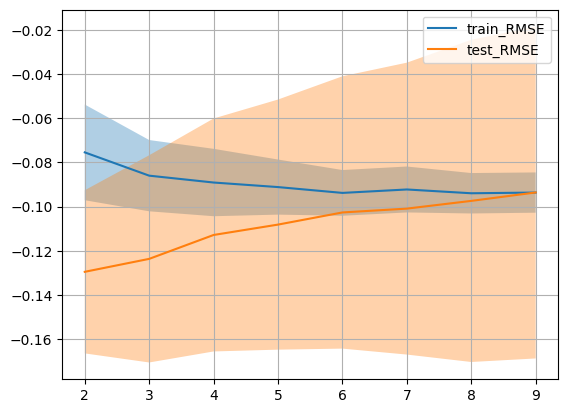

In [596]:
sub_gs = gs_df.groupby(['k_folds', 'type'])[['test_RMSE', 'train_RMSE']]
#sub_gsl = gs_df[gs_df['type'] == 0].groupby(['k_folds'])[['test_r2', 'train_r2']]
#sub_gsl.agg(['mean', 'std']).plot(legend=True, marker=".", alpha=0.5)
sub_gs = sub_gs.agg(['mean', 'std']).unstack()

#ax = sub_gs.plot(legend=True, marker=".", alpha=0.7)


fig, ax = plt.subplots()
ax.grid()
#ax.set_ylim([-2, 2])
for item in ['train_RMSE', 'test_RMSE']:
    for regr_type in [0]: #sub_gs[item]['mean']:
        mean = sub_gs[item]['mean'][regr_type]
        std = sub_gs[item]['std'][regr_type]
        ax.plot(sub_gs.index, mean, label=item)
        ax.fill_between(sub_gs.index, mean - std, mean + std, alpha=0.35)
ax.legend()
        #lines, labels
#lines, labels = ax.get_legend_handles_labels()
#ax.legend(lines, labels, loc='best')
#lines, labels
#ax.fill_between(sub_gs, m.Mean - m.Std, m.Mean + m.Std, alpha=0.35)

#profile_gs = ProfileReport(gs_df, title="Report for training and test results")
#profile_gs

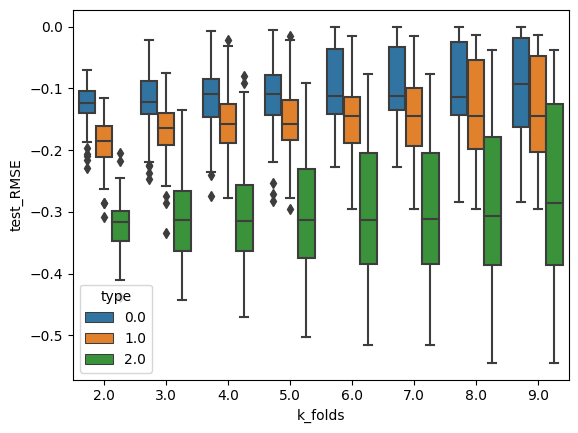

In [597]:
ax = sns.boxplot(x="k_folds", y="test_RMSE", hue="type", data=gs_df)

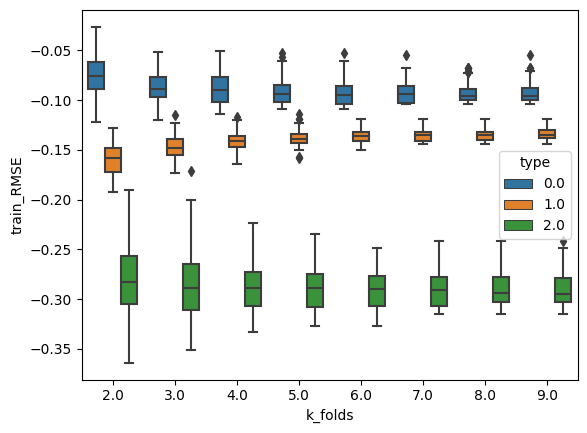

In [598]:
ax = sns.boxplot(x="k_folds", y="train_RMSE", hue="type", data=gs_df)